# Creating GIFs with STAC

In [ ]:
from pystac.client import Client
import geopandas as gpd
from pystac.item import Item
from typing import Dict, Any
from shapely.geometry import shape
import leafmap.leafmap as leafmap
import stackstac
from rasterio.enums import Resampling
import os
import matplotlib.pyplot as plt
import geogif 
import bottleneck as bn

str

In [ ]:
time_range = "2025-01-01/2025-09-30"

bbox = [-41.213201983359795, -21.66435718605456, -41.25519, -21.63603113583997]

catalog = Client.open('https://earth-search.aws.element84.com/v1')

aoi = gpd.read_file('./assets/agriculture.geojson')

aoi_json = {
    "type": "Polygon",
    "coordinates": [
        [
            [-41.25519588361465,-21.63603113583997],
            [-41.25519588361465,-21.66435718605456],
            [-41.213201983359795,-21.66435718605456],
            [-41.213201983359795,-21.63603113583997],
            [-41.25519588361465,-21.63603113583997]
        ]
    ]
}

search = catalog.search(
     intersects=aoi_json, 
    datetime=time_range,
    collections = ['sentinel-2-l2a'],
    query=["eo:cloud_cover<=5"])
items = search.item_collection()




In [ ]:


items_df = gpd.GeoDataFrame.from_features(items.to_dict(), crs = 'epsg:4326')

items_df

geometry  \
0   POLYGON ((-41.64717 -20.76695, -41.9012 -21.76...   
1   POLYGON ((-41.65066 -20.77924, -41.89995 -21.7...   
2   POLYGON ((-41.89248 -21.6743, -42.08441 -22.42...   
3   POLYGON ((-41.66098 -20.76722, -41.91481 -21.7...   
4   POLYGON ((-41.66409 -20.77903, -41.89621 -21.6...   
5   POLYGON ((-41.88003 -21.67407, -42.08386 -22.4...   
6   POLYGON ((-41.64822 -20.76697, -41.90274 -21.7...   
7   POLYGON ((-41.65162 -20.77922, -41.89997 -21.7...   
8   POLYGON ((-41.90087 -21.67446, -42.0852 -22.39...   
9   POLYGON ((-41.66894 -20.76738, -41.92321 -21.7...   
10  POLYGON ((-41.67177 -20.77891, -41.89895 -21.6...   
11  POLYGON ((-41.8863 -21.67419, -42.08542 -22.44...   
12  POLYGON ((-41.65494 -20.7671, -41.90863 -21.76...   
13  POLYGON ((-41.65833 -20.77912, -41.89997 -21.7...   
14  POLYGON ((-41.66136 -20.76723, -41.91472 -21.7...   
15  POLYGON ((-41.66107 -20.76722, -41.9151 -21.76...   
16  POLYGON ((-41.66409 -20.77903, -41.89638 -21.6...   
17  POLYGON ((-41.88862 -21.67423, -42.08552 -22.4...   
18  POLYGON ((-41.65685 -20.76714, -41.91095 -21.7...   
19  POLYGON ((-41.66025 -20.77909, -41.89718 -21.7...   
20  POLYGON ((-41.89441 -21.67434, -42.0842 -22.41...   
21  POLYGON ((-41.6629 -20.76726, -41.91665 -21.76...   
22  POLYGON ((-41.66601 -20.779, -41.89802 -21.688...   
23  POLYGON ((-41.6511 -20.76703, -41.90496 -21.76...   
24  POLYGON ((-41.6545 -20.77918, -41.89326 -21.71...   

                     created     platform constellation instruments  \
0   2025-09-16T17:17:49.397Z  sentinel-2b    sentinel-2       [msi]   
1   2025-09-16T17:30:42.194Z  sentinel-2b    sentinel-2       [msi]   
2   2025-08-22T18:34:01.711Z  sentinel-2c    sentinel-2       [msi]   
3   2025-08-22T18:32:24.968Z  sentinel-2c    sentinel-2       [msi]   
4   2025-08-22T18:41:05.721Z  sentinel-2c    sentinel-2       [msi]   
5   2025-08-07T15:52:35.062Z  sentinel-2b    sentinel-2       [msi]   
6   2025-08-07T15:49:32.674Z  sentinel-2b    sentinel-2       [msi]   
7   2025-08-07T15:52:28.565Z  sentinel-2b    sentinel-2       [msi]   
8   2025-07-23T18:28:23.191Z  sentinel-2c    sentinel-2       [msi]   
9   2025-07-23T18:16:15.748Z  sentinel-2c    sentinel-2       [msi]   
10  2025-07-23T18:28:28.795Z  sentinel-2c    sentinel-2       [msi]   
11  2025-07-18T17:28:25.202Z  sentinel-2b    sentinel-2       [msi]   
12  2025-07-18T17:25:38.345Z  sentinel-2b    sentinel-2       [msi]   
13  2025-07-18T17:30:23.327Z  sentinel-2b    sentinel-2       [msi]   
14  2025-05-19T17:24:47.458Z  sentinel-2b    sentinel-2       [msi]   
15  2025-05-09T17:25:43.552Z  sentinel-2b    sentinel-2       [msi]   
16  2025-05-09T17:22:26.569Z  sentinel-2b    sentinel-2       [msi]   
17  2025-03-10T15:47:21.052Z  sentinel-2b    sentinel-2       [msi]   
18  2025-03-10T15:48:47.124Z  sentinel-2b    sentinel-2       [msi]   
19  2025-03-10T15:48:36.852Z  sentinel-2b    sentinel-2       [msi]   
20  2025-02-18T16:02:58.993Z  sentinel-2b    sentinel-2       [msi]   
21  2025-02-18T16:44:10.861Z  sentinel-2b    sentinel-2       [msi]   
22  2025-02-18T15:32:52.033Z  sentinel-2b    sentinel-2       [msi]   
23  2025-01-19T19:05:37.097Z  sentinel-2b    sentinel-2       [msi]   
24  2025-01-19T19:00:57.163Z  sentinel-2b    sentinel-2       [msi]   

    eo:cloud_cover                         proj:centroid  mgrs:utm_zone  \
0         4.561333   {'lat': -21.2893, 'lon': -41.41711}             23   
1         3.730197  {'lat': -21.30003, 'lon': -41.30714}             24   
2         0.607562  {'lat': -22.18177, 'lon': -41.52179}             23   
3         0.089283  {'lat': -21.28881, 'lon': -41.42389}             23   
4         0.113667  {'lat': -21.29954, 'lon': -41.31414}             24   
5         2.265144  {'lat': -22.18299, 'lon': -41.51731}             23   
6         0.422302  {'lat': -21.28931, 'lon': -41.41776}             23   
7         0.331205  {'lat': -21.29993, 'lon': -41.30736}             24   
8         4.736890   {'lat': -22.1809, '

In [ ]:
# https://pystac-client.readthedocs.io/en/v0.7.2/tutorials/aoi-coverage.html

def intersection_percent(item: Item, aoi: Dict[str, Any]) -> float:
    '''The percentage that the Item's geometry intersects the AOI. An Item that
    completely covers the AOI has a value of 100.
    '''
    geom_item = shape(item.geometry)
    geom_aoi = shape(aoi)

    intersected_geom = geom_aoi.intersection(geom_item)

    intersection_percent = (intersected_geom.area * 100) / geom_aoi.area

    return intersection_percent

In [66]:
print([f"{intersection_percent(item, aoi_json):.2f}" for item in search.items()])

['100.00', '100.00', '14.40', '100.00', '100.00', '14.37', '100.00', '100.00', '14.41', '100.00', '100.00', '14.38', '100.00', '100.00', '100.00', '100.00', '100.00', '14.39', '100.00', '100.00', '14.40', '100.00', '100.00', '100.00', '100.00']


In [67]:
# create a generator that filters to only those Items that intersect more than 5%
items_gt_90_percent = (
    i for i in search.items() if intersection_percent(i, aoi_json) > 90
)

In [69]:
filtered_items = []
for item in items_gt_90_percent:
    filtered_items.append(item)

In [ ]:
Map = leafmap.Map(center = 
                [items_df['geometry'][0].centroid.y, items_df['geometry'][0].centroid.x], zoom = 12)


Map.add_gdf(items_df)


In [42]:
Map

Map(center=[-22.182422061526356, -41.52002978136008], controls=(ZoomControl(options=['position', 'zoom_in_text…

In [44]:
aoi_bbox = aoi.total_bounds
aoi_bbox

array([-41.25519588, -21.66435719, -41.21320198, -21.63603114])

In [71]:
bands = ["red", "green", "blue"]

cube_bands = stackstac.stack(
    filtered_items,
    assets = bands,
    bounds_latlon=aoi_bbox,
    epsg = 32624
)


In [72]:
cube_bands.band

<xarray.DataArray 'band' (band: 3)> Size: 60B
array(['red', 'green', 'blue'], dtype='<U5')
Coordinates: (12/13)
  * band                                     (band) <U5 60B 'red' 'green' 'blue'
    s2:product_type                          <U7 28B 'S2MSI2A'
    s2:processing_baseline                   <U5 20B '05.11'
    s2:saturated_defective_pixel_percentage  int64 8B 0
    constellation                            <U10 40B 'sentinel-2'
    mgrs:latitude_band                       <U1 4B 'K'
    ...                                       ...
    s2:datatake_type                         <U8 32B 'INS-NOBS'
    s2:snow_ice_percentage                   int64 8B 0
    instruments                              <U3 12B 'msi'
    proj:shape                               object 8B {10980}
    gsd                                      int64 8B 10
    epsg                                     int64 8B 32624

In [ ]:
# in case of requesting AWS keys
os.environ['AWS_NO_SIGN_REQUEST'] = 'YES'

Text(0.5, 1.0, 'Median RGB Composition')

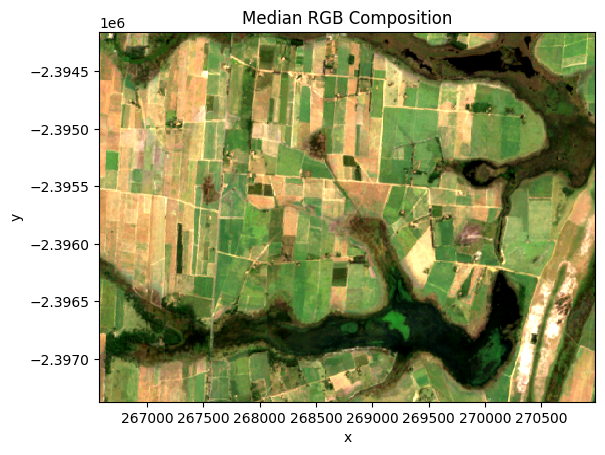

In [92]:
rgb = cube_bands.sel(
    band = ['red', 'green', 'blue'
            ]).median("time", keep_attrs = True)


rgb = rgb.compute()
rgb.plot.imshow(
    rgb="band",
    robust=True
)

plt.title('Median RGB Composition')

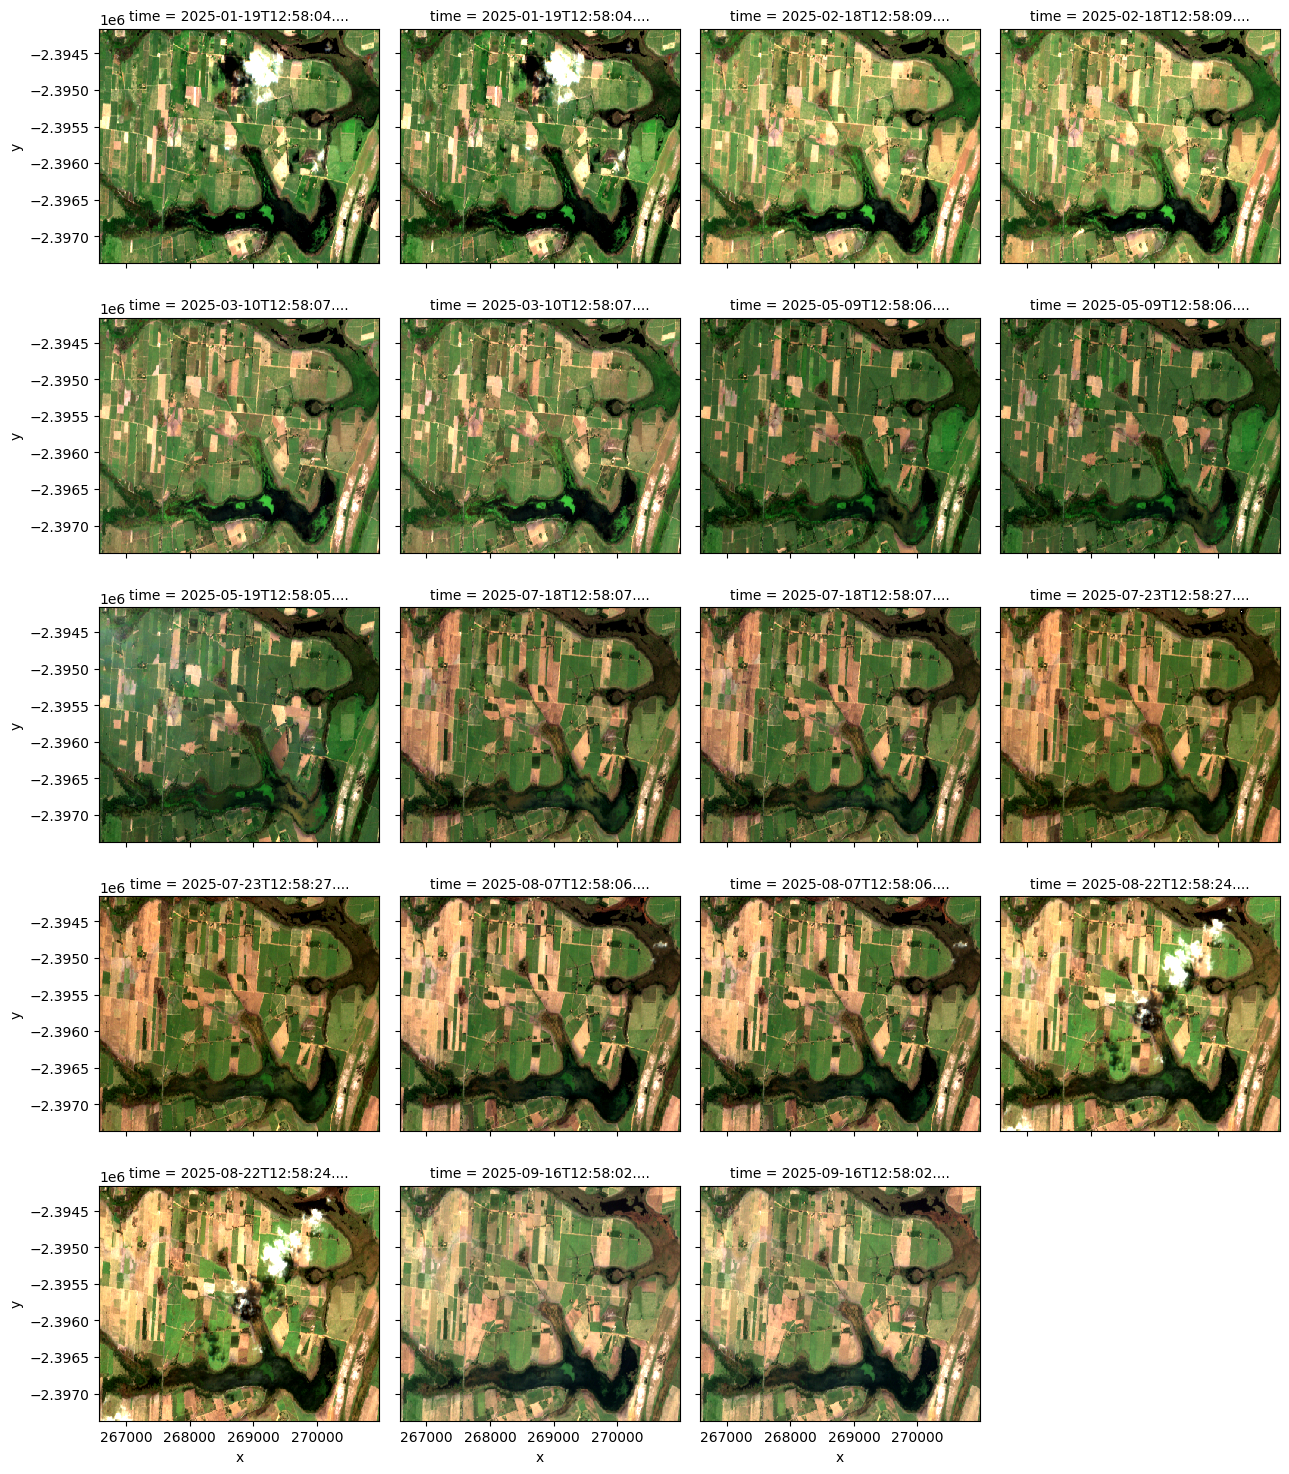

In [93]:
# plotting every image
imgs = cube_bands.compute()

imgs.plot.imshow(
    col = 'time', 
    rgb = 'band',  
    col_wrap=4,  robust=True
    );

In [77]:
Map = leafmap.Map(center = 
                [items_df['geometry'][0].centroid.y, items_df['geometry'][0].centroid.x], zoom = 12)


Map.add_gdf(items_df)

In [78]:
Map

Map(center=[-21.289300002972485, -41.41710557769423], controls=(ZoomControl(options=['position', 'zoom_in_text…

In [ ]:
cleaned = cube_bands.ffill('time').bfill("time")

gif_img = geogif.dgif(cleaned, fps=5).compute()
#https://hamedalemo.github.io/advanced-geo-python/lectures/stackstac.html


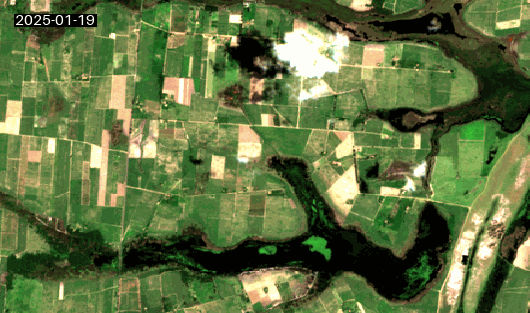

In [86]:
gif_img

In [89]:
gif_bytes = geogif.dgif(cleaned, bytes=True).compute()

with open("campos.gif", "wb") as f:
    f.write(gif_bytes)